In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [239]:
xls = pd.ExcelFile('COVIDsurveytables.xlsx')
df1 = pd.read_excel(xls, 'sample size')
df2 = pd.read_excel(xls, 'contact')
df3 = pd.read_excel(xls, 'testing')
df4 = pd.read_excel(xls, 'Cases')
df5 = pd.read_excel(xls, 'symptoms among unwell')
df6 = pd.read_excel(xls, 'symptoms among COVID-19 cases')
df7 = pd.read_excel(xls, 'comorbidities among unwell')
df9 = pd.read_excel(xls, 'sought medical care')
df10 = pd.read_excel(xls, 'recent travel')

## Sample size

In [268]:
new_header = df1.iloc[0]
df1 = df1[1:]
df1.columns = new_header

In [269]:
df1.dropna(axis=1, inplace=True)

C:\Users\Harsh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [270]:
df1 = df1.rename(columns={"n people (households x number of people in each household)": "n people"})

In [271]:
df1["date_joined"] = pd.to_datetime(df1["date joined survey"], infer_datetime_format=True)
df1["month_joined"] = df1['date_joined'].dt.month
df1["month_joined"]

1     4
2     4
3     4
4     4
5     4
     ..
61    6
62    6
63    6
64    6
65    6
Name: month_joined, Length: 65, dtype: int64

In [266]:
# df1['n people'].groupby([df1["month_joined"]]).plot(kind='line');

In [60]:
# plt.subplots(1, sharex=True)
# people = df1['n people'].groupby([df1["month_joined"]]).plot(kind='line', color = 'red')
# cumulative = df1['n cumulative'].groupby([df1["month_joined"]]).plot(kind='line', color = 'blue')

# plt.title("Sample Size over time")
# plt.ylabel('Count')
# plt.xlabel('Month')
# plt.legend(('Sample', 'Total participants'));

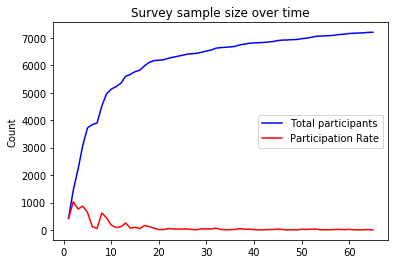

In [274]:
plt.subplots(1, sharex=True)
cumulative = df1['n cumulative'].plot(kind='line', color = 'blue')
people = df1['n people'].plot(kind='line', color = 'red')

plt.title("Survey sample size over time")
plt.ylabel('Count')
plt.legend(('Total participants', 'Participation Rate'));

## Contact

In [212]:
new_header2 = df2.iloc[2]
df2 = df2[3:]
df2.columns = new_header2

In [213]:
df2.columns = ['drop', 'start_week', 'total_respondents', 'n1', 'total%1', 'n2', 'total%2', 'n3', 'total%3', 'n4', 'total%4']
df2 = df2.drop(['drop'], axis=1)

In [214]:
df2_clean = df2.copy()

In [215]:
df2_clean = df2_clean.drop(df2_clean.index[10])
# df2_clean['start_week'] = pd.to_datetime(df2_clean['start_week'], infer_datetime_format=True)

In [216]:
# df2_clean["n1"] = pd.to_numeric(df2_clean["n1"])
# df2_clean["n2"] = pd.to_numeric(df2_clean["n2"])
# df2_clean["n3"] = pd.to_numeric(df2_clean["n3"])
df2_clean

,start_week,total_respondents,n1,total%1,n2,total%2,n3,total%3,n4,total%4
3,20APR2020,3893,65,0.0166966,2729,0.701002,1099,0.282302,0,0
4,27APR2020,4707,76,0.0161462,3423,0.727215,1201,0.255152,7,0.00148715
5,04MAY2020,4087,81,0.0198189,2985,0.730365,1021,0.249816,0,0
6,11MAY2020,3352,19,0.00566826,2448,0.73031,883,0.263425,2,0.000596659
7,18MAY2020,2947,36,0.0122158,2088,0.708517,823,0.279267,0,0
8,25MAY2020,2687,24,0.00893189,1797,0.668776,862,0.320804,4,0.00148865
9,01JUN2020,2378,31,0.0130362,1609,0.676619,738,0.310345,0,0
10,08JUN2020,2324,42,0.0180723,1503,0.64673,779,0.335198,0,0
11,15JUN2020,2171,68,0.031322,1429,0.658222,673,0.309995,1,0.000460617
12,22JUN2020,702,33,0.0470085,451,0.64245,218,0.310541,0,0


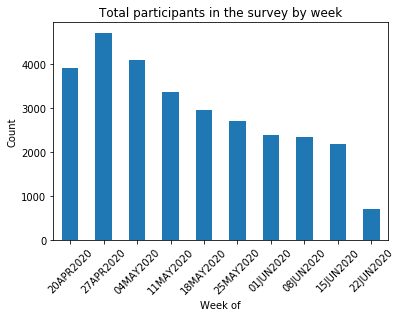

In [77]:
df2_clean.plot.bar(x="start_week", y="total_respondents", legend = False)
plt.title('Total participants in the survey by week')
plt.xlabel('Week of')
plt.ylabel('Count')
plt.xticks(rotation=45);

In [158]:
# indx = np.arange(len(df2_clean))
# n1 = df2_clean.iloc[:, 2]
# n2 = df2_clean.iloc[:, 4]
# n3 = df2_clean.iloc[:, 6]

# df2_2 = pd.DataFrame([n1, n2, n3])
# df2_2

,3,4,5,6,7,8,9,10,11,12
n1,65,76,81,19,36,24,31,42,68,33
n2,2729,3423,2985,2448,2088,1797,1609,1503,1429,451
n3,1099,1201,1021,883,823,862,738,779,673,218


In [238]:
week_index = []
for row in df2_clean.iloc[:,0]:
    week_index.append(row)
week_index

['20APR2020',
 '27APR2020',
 '04MAY2020',
 '11MAY2020',
 '18MAY2020',
 '25MAY2020',
 '01JUN2020',
 '08JUN2020',
 '15JUN2020',
 '22JUN2020']

In [287]:
n1_array = np.array(df2_clean.iloc[:, 2])
n2_array = np.array(df2_clean.iloc[:, 4])
n3_array = np.array(df2_clean.iloc[:, 6])
n4_array = np.array(df2_clean.iloc[:, 8])

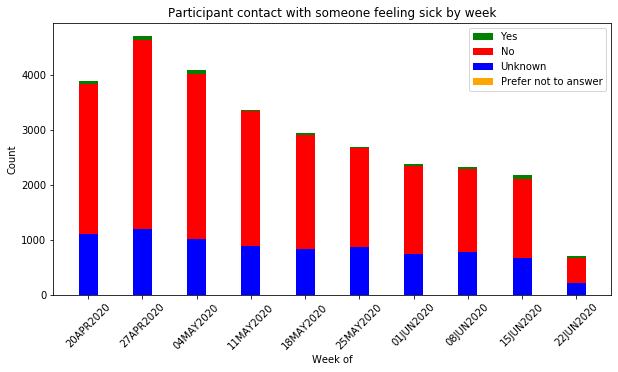

In [288]:
plt.figure(figsize=(10,5))
plt.bar(week_index, n1_array, width=0.35, label = 'Yes', color='green', bottom = n2_array+n3_array)
plt.bar(week_index, n2_array, width=0.35, label = 'No', color='red', bottom = n3_array)
plt.bar(week_index, n3_array, width=0.35, label = 'Unknown', color='blue')
plt.bar(week_index, n4_array, width=0.35, label = 'Prefer not to answer', color='orange', bottom = n2_array+n1_array+n3_array)
plt.xticks(rotation=45)
plt.title('Participant contact with someone feeling sick by week')
plt.xlabel('Week of')
plt.ylabel('Count')
plt.legend();

Based on this graph we can wee that the primary distinction is between people who say they have NOT had contact with someone who was feeling sick, and those who otherwise do not know if they have had contact with someone feeling sick.

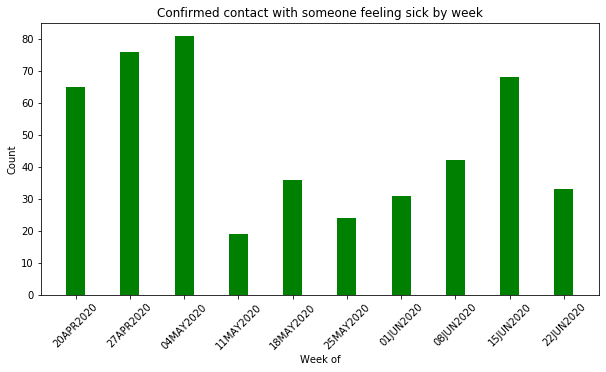

In [290]:
plt.figure(figsize=(10,5))
plt.bar(week_index, n1_array, width=0.35, label = 'Yes', color='green')
plt.xticks(rotation=45)
plt.title('Confirmed contact with someone feeling sick by week')
plt.xlabel('Week of')
plt.ylabel('Count');

In [304]:
df2

,start_week,total_respondents,n1,total%1,n2,total%2,n3,total%3,n4,total%4
3,20APR2020,3893,65,0.0166966,2729,0.701002,1099,0.282302,0,0
4,27APR2020,4707,76,0.0161462,3423,0.727215,1201,0.255152,7,0.00148715
5,04MAY2020,4087,81,0.0198189,2985,0.730365,1021,0.249816,0,0
6,11MAY2020,3352,19,0.00566826,2448,0.73031,883,0.263425,2,0.000596659
7,18MAY2020,2947,36,0.0122158,2088,0.708517,823,0.279267,0,0
8,25MAY2020,2687,24,0.00893189,1797,0.668776,862,0.320804,4,0.00148865
9,01JUN2020,2378,31,0.0130362,1609,0.676619,738,0.310345,0,0
10,08JUN2020,2324,42,0.0180723,1503,0.64673,779,0.335198,0,0
11,15JUN2020,2171,68,0.031322,1429,0.658222,673,0.309995,1,0.000460617
12,22JUN2020,702,33,0.0470085,451,0.64245,218,0.310541,0,0


In [217]:
pie_vals = df2.loc[df2['start_week'] == "Total", ['n1','n2','n3']].values.flatten().tolist()
pie_labels = ['Yes', 'No', 'Unknown']
# "prefer not to answer" omitted because it was too small

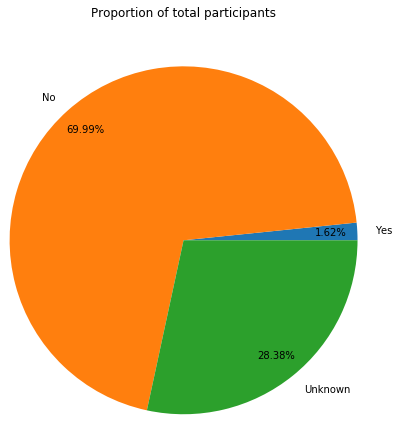

In [228]:
plt.axis('equal')
plt.pie(pie_vals, labels = pie_labels, radius = 2, autopct = '%0.2f%%', pctdistance=0.85)
plt.title('Proportion of total participants', y=1.5);

## Testing

In [3]:
df3.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,People tested for COVID-19,NaN,NaN,People who asked for a COVID-19 test but did n...,NaN,NaN
1,NaN,Week beginning,total respondents,total people feeling unwell,n,% of all respondents,% of people unwell,n,% of all respondents,% people unwell
2,NaN,20APR2020,3898,71,13,0.00333504,0.183099,7,0.00179579,0.0985915
3,NaN,27APR2020,4709,86,17,0.00361011,0.197674,6,0.00127416,0.0697674
4,NaN,04MAY2020,4089,57,9,0.00220103,0.157895,2,0.000489117,0.0350877


In [3]:
new_header3 = df3.iloc[1]
df3 = df3[2:]
df3.columns = new_header3

In [4]:
df3.columns = ['drop', 'start_week', 'total_respondents', 'total_unwell', 'n1', 'n1total%', 'n1unwell%', 'n2', 'n2total%', 'n2unwell%']
df3 = df3.drop(['drop'], axis=1)

In [5]:
df3_clean = df3.copy()

In [6]:
df3_clean = df3_clean.drop(df3_clean.index[-1])

In [7]:
df3_clean

,start_week,total_respondents,total_unwell,n1,n1total%,n1unwell%,n2,n2total%,n2unwell%
2,20APR2020,3898,71,13,0.00333504,0.183099,7,0.00179579,0.0985915
3,27APR2020,4709,86,17,0.00361011,0.197674,6,0.00127416,0.0697674
4,04MAY2020,4089,57,9,0.00220103,0.157895,2,0.000489117,0.0350877
5,11MAY2020,3352,40,10,0.00298329,0.25,1,0.000298329,0.025
6,18MAY2020,2951,30,6,0.00203321,0.2,0,0,0
7,25MAY2020,2687,22,3,0.00111649,0.136364,1,0.000372162,0.0454545
8,01JUN2020,2378,20,4,0.00168209,0.2,0,0,0
9,08JUN2020,2324,32,9,0.00387263,0.28125,1,0.000430293,0.03125
10,15JUN2020,2171,32,12,0.00552741,0.375,0,0,0
11,22JUN2020,702,13,3,0.0042735,0.230769,0,0,0


In [431]:
# df3_clean["n1unwell%"] = pd.to_numeric(df3_clean["n1unwell%"])
# df3_clean["n2unwell%"] = pd.to_numeric(df3_clean["n2unwell%"])

In [13]:
# df3_clean['n1unwell%'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df3_clean['n1unwell%']], index = df3_clean.index)
# df3_clean['n2unwell%'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df3_clean['n2unwell%']], index = df3_clean.index)

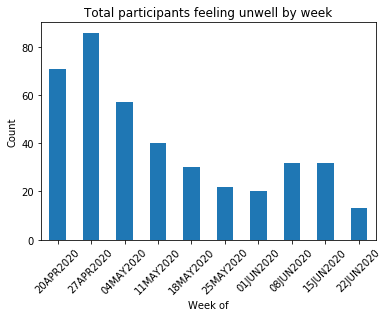

In [71]:
df3_clean.plot.bar(x="start_week", y="total_unwell", legend = False)
plt.title('Total participants feeling unwell by week')
plt.xlabel('Week of')
plt.ylabel('Count')
plt.xticks(rotation=45);

In [44]:
# import matplotlib.ticker as mtick
# plot1 = df3_clean.plot.line(x="start_week", y="n1unwell%", label = 'Feeling sick and tested for Covid-19')
# plot1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0));
# plt.xticks(rotation=45);
# plt.title('Proportion of participants feeling unwell who were tested for Coivd-19')
# plt.xlabel('Week of')
# plt.ylabel('Percent')
# plot2 = df3_clean.plot.line(x="start_week", y="n2unwell%", label = 'Feeling sick but not tested for Covid-19')
# plot2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0));
# plt.xticks(rotation=45);
# plt.title('Proportion of participants feeling unwell who were not tested for Coivd-19')
# plt.xlabel('Week of')
# plt.ylabel('Percent');

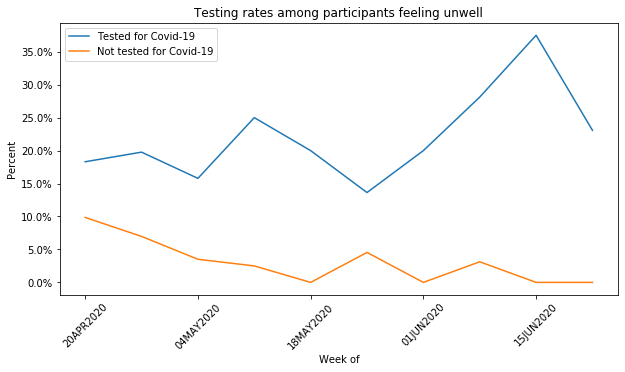

In [59]:
fig, ax = plt.subplots(ncols=1, sharey=True, figsize=(10,5))
plot1 = df3_clean.plot.line(x="start_week", y="n1unwell%", label = 'Tested for Covid-19', ax=ax)
plot1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0));
plot2 = df3_clean.plot.line(x="start_week", y="n2unwell%", label = 'Not tested for Covid-19', ax=ax)
plot2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0));
plt.xticks(rotation=45);
plt.title('Testing rates among participants feeling unwell')
plt.xlabel('Week of')
plt.ylabel('Percent');

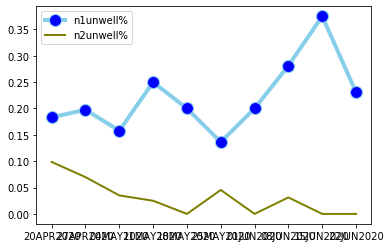

In [44]:
# plot1 = plt.plot( 'start_week', 'n1unwell%', data=df3_clean, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)

# plot2 = plt.plot( 'start_week', 'n2unwell%', data=df3_clean, marker='', color='olive', linewidth=2)

# plt.legend()

## Cases

In [13]:
df4.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,People unwell,NaN,People with a positive COVID-19 test,NaN,NaN,NaN,People diagnosed with COVID-19 based on sympto...,NaN,NaN
1,NaN,Week beginning,total respondents,People in households with everyone healthy,n,% of all respondents,n,% of all respondents,% of people unwell,% of people tested,n,% of all respondents,% of people unwell
2,NaN,20APR2020,3898,3701,71,0.0182145,1,0.000256542,0.0140845,0.0769231,3,0.000769625,0.0422535
3,NaN,27APR2020,4709,4475,86,0.0182629,4,0.000849437,0.0465116,0.235294,4,0.000849437,0.0465116
4,NaN,04MAY2020,4089,3915,57,0.0139398,3,0.000733676,0.0526316,0.333333,1,0.000244559,0.0175439


In [16]:
new_header4 = df4.iloc[1]
df4 = df4[2:]
df4.columns = new_header4

In [18]:
df4.columns = ['drop', 'start_week', 'total_respondents', 'total_healthy', 'n1', 'n1total%', 'n2', 'n2total%', 'n2unwell%', 'n2test%', 'n3', 'n3total%', 'n3unwell%']
df4 = df4.drop(['drop'], axis=1)

In [20]:
df4_clean = df4.copy()

In [21]:
df4_clean = df4_clean.drop(df4_clean.index[-1])

In [22]:
df4_clean

,start_week,total_respondents,total_healthy,n1,n1total%,n2,n2total%,n2unwell%,n2test%,n3,n3total%,n3unwell%
2,20APR2020,3898,3701,71,0.0182145,1,0.000256542,0.0140845,0.0769231,3,0.000769625,0.0422535
3,27APR2020,4709,4475,86,0.0182629,4,0.000849437,0.0465116,0.235294,4,0.000849437,0.0465116
4,04MAY2020,4089,3915,57,0.0139398,3,0.000733676,0.0526316,0.333333,1,0.000244559,0.0175439
5,11MAY2020,3352,3227,40,0.0119332,0,0,0,0,0,0,0
6,18MAY2020,2951,2850,30,0.010166,0,0,0,0,0,0,0
7,25MAY2020,2687,2591,22,0.00818757,0,0,0,0,0,0,0
8,01JUN2020,2378,2326,20,0.00841043,0,0,0,0,0,0,0
9,08JUN2020,2324,2228,32,0.0137694,0,0,0,0,0,0,0
10,15JUN2020,2171,2074,32,0.0147398,1,0.000460617,0.03125,0.0833333,1,0.000460617,0.03125
11,22JUN2020,702,673,13,0.0185185,0,0,0,0,0,0,0


In [107]:
# df4_clean.plot.bar(x="start_week", y="n1", legend = False)
# plt.title('Total participants feeling unwell by week')
# plt.xlabel('Week of')
# plt.ylabel('Count')
# plt.xticks(rotation=45);

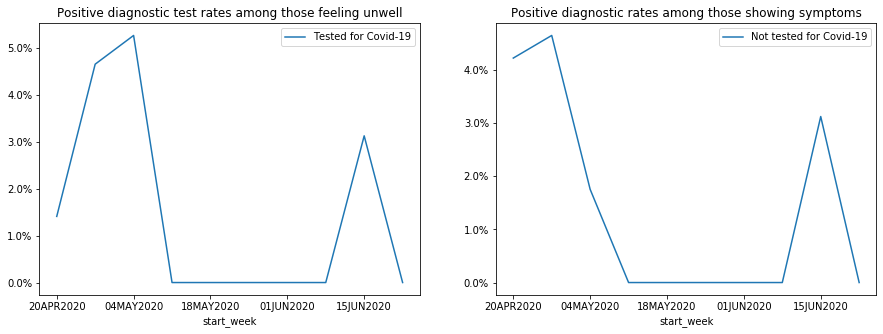

In [95]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,5))
plot3 = df4_clean.plot.line(x="start_week", y="n2unwell%", label = 'Tested for Covid-19', ax=ax, title = 'Positive diagnostic test rates among those feeling unwell')
plot3.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xticks(rotation=45);
plot4 = df4_clean.plot.line(x="start_week", y="n3unwell%", label = 'Not tested for Covid-19', ax=ax2)
plot4.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0));
plt.title('Positive diagnostic rates among those showing symptoms');

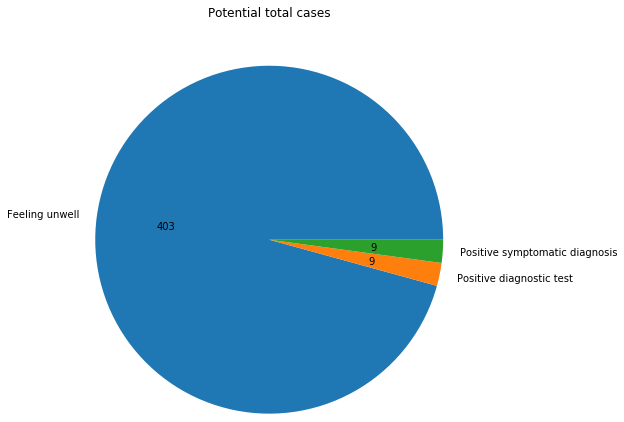

In [106]:
pie_vals2 = df4.loc[df4['start_week'] == "Total", ['n1','n2','n3']].values.flatten().tolist()
pie_labels2 = ['Feeling unwell', 'Positive diagnostic test', 'Positive symptomatic diagnosis']
plt.axis('equal')
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format
plt.pie(pie_vals2, labels = pie_labels2, radius = 2, autopct = autopct_format(pie_vals2))
plt.title('Potential total cases', y=1.5);

## Symptoms among unwell

In [115]:
df5.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
0,NaN,NaN,NaN,NaN,Fatigue,NaN,NaN,Cough,NaN,NaN,...,NaN,Rash,NaN,NaN,Pink eye,NaN,NaN,Loss of smell or taste,NaN,NaN
1,NaN,Week beginning,total respondents,total people feeling unwell,n among people unwell,% of all respondents,% of people unwell,n among people unwell,% of all respondents,% of people unwell,...,% of people unwell,n among people unwell,% of all respondents,% of people unwell,n among people unwell,% of all respondents,% of people unwell,n among people unwell,% of all respondents,% of people unwell
2,NaN,20APR2020,3898,71,51,0.0130836,0.71831,34,0.00872242,0.478873,...,0.366197,2,0.000513084,0.028169,2,0.000513084,0.028169,4,0.00102617,0.056338
3,NaN,27APR2020,4709,86,55,0.0116798,0.639535,34,0.00722022,0.395349,...,0.55814,3,0.000637078,0.0348837,3,0.000637078,0.0348837,8,0.00169887,0.0930233
4,NaN,04MAY2020,4089,57,29,0.0070922,0.508772,22,0.00538029,0.385965,...,0.368421,2,0.000489117,0.0350877,0,0,0,3,0.000733676,0.0526316


In [131]:
symp_vals = np.array(df5.loc[df5['Unnamed: 1'] == "Total", ['Unnamed: 4', 'Unnamed: 7', 'Unnamed: 10', 'Unnamed: 13', 'Unnamed: 16', 'Unnamed: 19', 'Unnamed: 22', 'Unnamed: 25', 'Unnamed: 28', 'Unnamed: 31', 'Unnamed: 34', 'Unnamed: 37', 'Unnamed: 40', ]])
symp_labels = ['Fatigue', 'Cough', 'Nausea/Vomiting', 'Sore throat', 'Fever', 'Diarrhea', 'Difficulty breathing', 'Body aches', 'Chills', 'Headache', 'Rash', 'Pink eye', 'Loss of smell/taste']

C:\Users\Harsh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


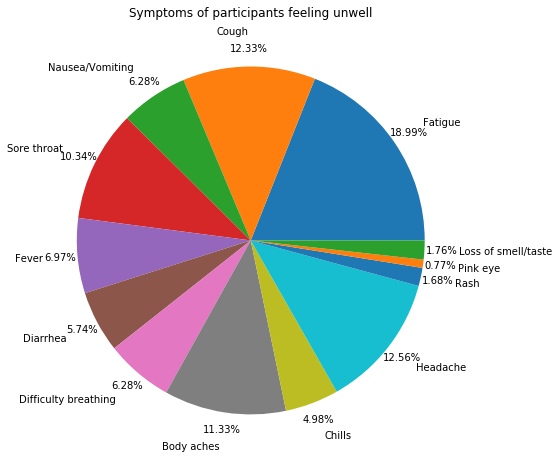

In [210]:
plt.axis('equal')
plt.pie(symp_vals, labels = symp_labels, radius = 2, autopct = '%0.2f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Symptoms of participants feeling unwell', y=1.5);

## Symptoms among Covid-19 cases

In [137]:
df6.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,NaN,NaN,NaN,Fatigue,NaN,Cough,NaN,Nausea or vomiting,NaN,Sore throat,...,Chills or nightsweats,NaN,Headache,NaN,Rash,NaN,Pink eye,NaN,Loss of smell or taste,NaN
1,NaN,Week beginning,total people with positive COVID-19 test,n among COVID-19 cases,% of COVID-19 cases,n among COVID-19 cases,% of COVID-19 cases,n among COVID-19 cases,% of COVID-19 cases,n among COVID-19 cases,...,n among COVID-19 cases,% of COVID-19 cases,n among COVID-19 cases,% of COVID-19 cases,n among COVID-19 cases,% of COVID-19 cases,n among COVID-19 cases,% of COVID-19 cases,n among COVID-19 cases,% of COVID-19 cases
2,NaN,20APR2020,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,27APR2020,4,4,1,3,0.75,2,0.5,0,...,1,0.25,4,1,0,0,0,0,4,1
4,NaN,04MAY2020,3,2,0.666667,1,0.333333,1,0.333333,0,...,0,0,2,0.666667,0,0,0,0,2,0.666667


In [163]:
symp_vals2 = df6.loc[df6['Unnamed: 1'] == "Total", ['Unnamed: 4', 'Unnamed: 6', 'Unnamed: 8',  'Unnamed: 10', 'Unnamed: 12', 'Unnamed: 14', 'Unnamed: 16', 'Unnamed: 18', 'Unnamed: 20', 'Unnamed: 22', 'Unnamed: 24', 'Unnamed: 26', 'Unnamed: 28',]].values.flatten().tolist()

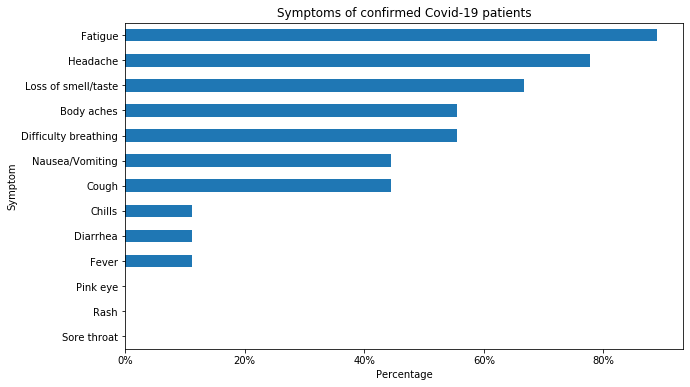

In [237]:
covid_symp = pd.DataFrame({'symptoms':symp_vals2}, index = symp_labels)
covid_symp.sort_values('symptoms',inplace=True)
Cplot = covid_symp.plot.barh(legend = False, figsize=(10,6));
Cplot.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.title('Symptoms of confirmed Covid-19 patients')
plt.xlabel('Percentage')
plt.ylabel('Symptom');

In [190]:
# plt.axis('equal')
# plt.pie(symp_vals2, labels = symp_labels, radius = 2, autopct = '%0.2f%%')
# plt.title('Symptoms of participants with positive Covid-19 diagnostic test', y=1.5);

## Comorbidities among unwell

In [230]:
df7.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,NaN,NaN,NaN,NaN,Hypertension,NaN,Cancer,NaN,Diabetes,NaN,...,Chronic kidney disease,NaN,Cerebrovascular disease,NaN,Chronic obstructive pulmonary disease,NaN,Other pre-existing condition,NaN,No pre-existing conditions,NaN
1,NaN,Week beginning,total respondents,total people feeling unwell,n among people unwell,% of people unwell,n among people unwell,% of people unwell,n among people unwell,% of people unwell,...,n among people unwell,% of people unwell,n among people unwell,% of people unwell,n among people unwell,% of people unwell,n among people unwell,% of people unwell,n among people unwell,% of people unwell
2,NaN,20APR2020,3898,71,18,0.253521,3,0.0422535,4,0.056338,...,4,0.056338,2,0.028169,2,0.028169,13,0.183099,13,0.183099
3,NaN,27APR2020,4709,86,22,0.255814,4,0.0465116,3,0.0348837,...,2,0.0232558,0,0,2,0.0232558,22,0.255814,13,0.151163
4,NaN,04MAY2020,4089,57,14,0.245614,1,0.0175439,6,0.105263,...,0,0,1,0.0175439,4,0.0701754,7,0.122807,7,0.122807


In [233]:
comorbs = df7.loc[df7['Unnamed: 1'] == "Total", ['Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9',  'Unnamed: 11', 'Unnamed: 13', 'Unnamed: 15', 'Unnamed: 17', 'Unnamed: 19', 'Unnamed: 21', 'Unnamed: 23']].values.flatten().tolist()
comorb_labels = ['Hypertension', 'Cancer', 'Diabetes', 'Asthma', 'Seasonal allergies', 'Chronic kidney disease', 'Cerebrovascular disease', 'COPD', 'Other pre-existing condition', 'No pre-existing condition']

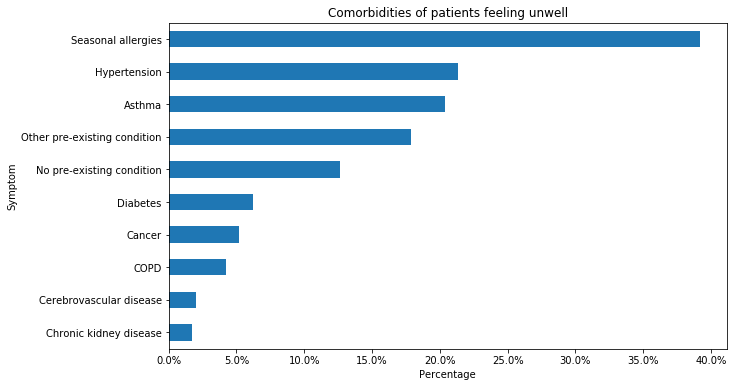

In [238]:
unwell_comorb = pd.DataFrame({'comorbidities':comorbs}, index = comorb_labels)
unwell_comorb.sort_values('comorbidities',inplace=True)
C2plot = unwell_comorb.plot.barh(legend = False, figsize=(10,6));
C2plot.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.title('Comorbidities of patients feeling unwell')
plt.xlabel('Percentage')
plt.ylabel('Symptom');

## Comorbidities among Covid-19 patients

> This sheet was mostly blank so I wasnt sure if any visualization would be useful

## Sought medical care

In [240]:
df9.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,Sought medical care,NaN,NaN,NaN,NaN,NaN
1,NaN,Week beginning,total respondents,total people feeling unwell,Yes (any of the three settings),"Yes, at a hospital/emergency room","Yes, at a clinic/urgent care/doctor's office","Yes, virtually via phone call/internet",No,Prefer not to say
2,NaN,20APR2020,3898,71,22,1,12,9,21,1
3,NaN,27APR2020,4709,86,24,4,13,7,37,0
4,NaN,04MAY2020,4089,57,13,3,3,7,12,0


In [264]:
total_unwell = df9['Unnamed: 3'].iloc[-1]
hosp = df9['Unnamed: 5'].iloc[-1]
clinic = df9['Unnamed: 6'].iloc[-1]
virtual = df9['Unnamed: 7'].iloc[-1]
no = df9['Unnamed: 8'].iloc[-1]
prefer = df9['Unnamed: 9'].iloc[-1]
sought_vals = [hosp, clinic, virtual, no, prefer]
sought_vals[:] = [x / total_unwell for x in sought_vals]
sought_labels = ['At hospital/ER', 'At clinic or doctors office', 'Virtual appointment', 'Did not seek care', 'Prefer not to say']

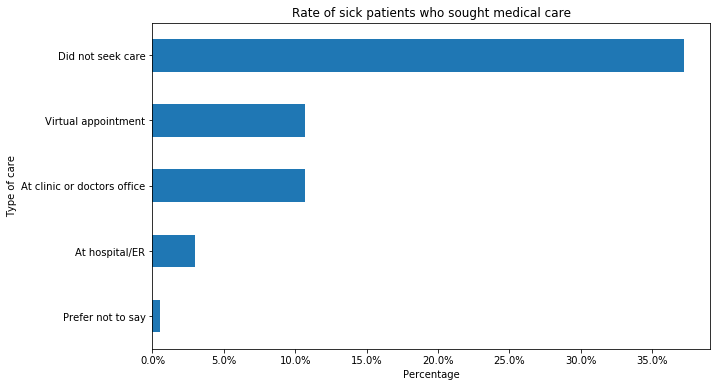

In [265]:
s_c = pd.DataFrame({'sought_care':sought_vals}, index = sought_labels)
s_c.sort_values('sought_care',inplace=True)
scplot = s_c.plot.barh(legend = False, figsize=(10,6));
scplot.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.title('Rate of sick patients who sought medical care')
plt.xlabel('Percentage')
plt.ylabel('Type of care');

## Recent travel

> Although this sheet has a uniform structure, it lacked enough data for me to produce a meaningful visualization. This  could still be a very useful topic of analysis, however travel rates are currently minimal. Maybe an updated data extract would help?